In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from mlu_tools.custom import custom_os

In [7]:
def load_model():
    print("Loading the model...")
    global model
    model = tf.keras.models.load_model(
        "/home/vikas/Downloads/kaggle-single-frame_base-mobilenet-v2.keras",
        {"preprocess_input": tf.keras.applications.mobilenet_v2.preprocess_input}
    )
    print("model loaded successfully!")

load_model()

Loading the model...
model loaded successfully!


In [8]:
test_data_dir = "dataset/kaggle-dataset-6classes-preprocessed/frames/test"

Rub your palms together


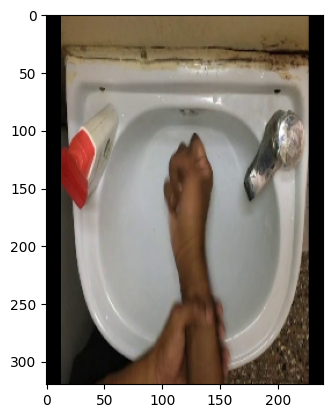

In [35]:
labels_dict = {0: "Rub both wrists in rotating manner",
            1: "Rub your palms together",
            2: "Rub the back of your fingers and hands",
            3: "Rub your hands by interlocking your fingers",
            4: "Interlock fingers and rub the back of fingers of both hands",
            5: "Rub the area between index finger and thumb",
            6: "Rub fingertips on palm of both hands in circular manner"}

cls = 0
for filename in custom_os.listdir(f"{test_data_dir}/{cls}"):
    frame_path = f"{test_data_dir}/{cls}/{filename}"
    img = cv2.imread(frame_path)[..., ::-1]
    img = cv2.resize(img, (240, 320))
    probas = model.predict(np.expand_dims(img, axis=0), verbose=0)
    label = probas.argmax()
    print(labels_dict[label])
    plt.imshow(img)
    break

In [37]:
total_files = 0
for subdir in custom_os.listdir(test_data_dir):
    total_files += len(custom_os.listdir(f"{test_data_dir}/{subdir}"))
total_files

9082

In [38]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(240, 320)
)
model.predict(test_ds)

Found 9082 files belonging to 3 classes.


In [39]:
model.predict(test_ds)

2024-12-16 20:45:51.890413: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-12-16 20:45:52.157710: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 239382528 exceeds 10% of free system memory.


  1/284 ━━━━━━━━━━━━━━━━━━━━ 19:28 4s/step

2024-12-16 20:45:54.078444: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-12-16 20:45:54.334882: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 239382528 exceeds 10% of free system memory.


  2/284 ━━━━━━━━━━━━━━━━━━━━ 9:09 2s/step 

2024-12-16 20:45:56.031664: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.


 10/284 ━━━━━━━━━━━━━━━━━━━━ 8:41 2s/step

KeyboardInterrupt: 